In [1]:
# LOAD DATASET
from util.data_loader import load_dataset
x_train, y_train, x_test, feature_names = load_dataset(
    path_x_train="./../course/projects/project1/data/dataset/x_train.csv",
    path_y_train="./../course/projects/project1/data/dataset/y_train.csv",
    path_x_test="./../course/projects/project1/data/dataset/x_test.csv"
)

KeyboardInterrupt: 

In [ ]:
# REMOVE USELESS FEATURES
from util.features_info import FEATURES_DICT
from util.features_util import keep_features
feature_indexes = dict(zip(feature_names, range(len(feature_names))))
x_clean, clean_features, clean_feature_index = keep_features(x_train, FEATURES_DICT.keys(), feature_names, feature_indexes)

In [ ]:
# PREPROCESS KEPT FEATURES
from util.features_info import REPLACEMENT_LIST
from util.preprocessing import preprocessing_pipeline
x_preprocessed = preprocessing_pipeline(x_clean, where=clean_features, feature_index=clean_feature_index,
                                        nan_replacement=REPLACEMENT_LIST)

# Modeling

In [127]:
from implementations import reg_logistic_regression, least_squares, ridge_regression,compute_loss, sigmoid
import numpy as np

In [31]:
y_train.shape, x_preprocessed.shape

((328135, 2), (328135, 78))

In [32]:
# standardization
mean = np.mean(x_preprocessed, axis=0)
std = np.std(x_preprocessed, axis=0)

# Standardize the matrix
x_std = (x_preprocessed - mean) / std

# get output
y = y_train[:,1]

In [58]:
len(x_std)

328135

In [66]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    f = np.ones(len(x))
    for j in range(degree):
        f = np.vstack((f,x**(j+1)))
    return f.T

In [67]:
def build_k_indices(y, k_fold, seed=1):
    """build k indices for k-fold.

    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold

    >>> build_k_indices(np.array([1., 2., 3., 4.]), 2, 1)
    array([[3, 2],
           [0, 1]])
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval : (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)


In [96]:
def cross_validation(y, x, k_indices, k, lambda_):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_indices = k_indices[k]
    train_indices = np.array([k_indices[i] for i in range(k_indices.shape[0]) if i != k]).flatten()
    
    y_test = y[test_indices]
    y_train = y[train_indices]
    
    x_test = x[test_indices]
    x_train = x[train_indices]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    # x_tr_poly = build_poly(x_train,degree)
    # x_te_poly = build_poly(x_test,degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w, loss = ridge_regression(y_train,x_train,lambda_)
    # loss = compute_loss(y, tx, w)
    # return w, loss
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_loss(y_train,x_train,w)
    loss_te = compute_loss(y_test,x_test,w)

    return loss_tr, loss_te

In [109]:
def cross_validation_log(y, x, k_indices, k, lambda_, w, max_iter,gamma):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_indices = k_indices[k]
    train_indices = np.array([k_indices[i] for i in range(k_indices.shape[0]) if i != k]).flatten()
    
    y_test = y[test_indices]
    y_train = y[train_indices]
    
    x_test = x[test_indices]
    x_train = x[train_indices]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    # x_tr_poly = build_poly(x_train,degree)
    # x_te_poly = build_poly(x_test,degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w, loss = reg_logistic_regression(y_train,x_train,lambda_,w,max_iter,gamma)
    # loss = compute_loss(y, tx, w)
    # return w, loss
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_loss(y_train,x_train,w)
    loss_te = compute_loss(y_test,x_test,w)

    return loss_tr, loss_te

In [110]:
from util.plotting import loss_visualization
def cross_validation_ridge_regression(y,x, k_fold, lambdas,w, max_iter,gamma):
    """cross validation over regularisation parameter lambda.

    Args:
        degree: integer, degree of the polynomial expansion
        k_fold: integer, the number of folds
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_rmse : scalar, the associated root mean squared error for the best lambda
    """

    seed = 12
    # degree = degree
    k_fold = k_fold
    lambdas = lambdas
    # split data in k fold
    print(y)
    k_indices = build_k_indices(y, k_fold, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation over lambdas: TODO
    # ***************************************************
    rmse_tr_all = []
    rmse_te_all = []
    for lambda_ in lambdas:
        # define lists to store the loss of training data and test data
        rmse_tr = []
        rmse_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation_log(y,x,k_indices,k,lambda_,w, max_iter,gamma)
            rmse_tr.append(loss_tr)
            rmse_te.append(loss_te)
        rmse_tr_all.append(np.mean(rmse_tr))
        rmse_te_all.append(np.mean(rmse_te))

    # cross_validation_visualization(lambdas, rmse_tr_all, rmse_te_all)
    loss_visualization(rmse_tr_all, rmse_te_all)
    best_rmse = rmse_te_all[np.argmin(rmse_te_all)]
    best_lambda = lambdas[np.argmin(rmse_te_all)]
    print(
        "For The choice of lambda which leads to the best test mse is %.5f with a test mse of %.3f"
        % (best_lambda, best_rmse)
    )
    return best_lambda, best_rmse


# best_lambda, best_rmse = cross_validation_demo(7, 4, np.logspace(-4, 0, 30))

[-1. -1. -1. ... -1. -1. -1.]
For The choice of lambda which leads to the best test rmse is 0.00599 with a test rmse of 0.475


(0.005994842503189421, 0.4750684951960573)

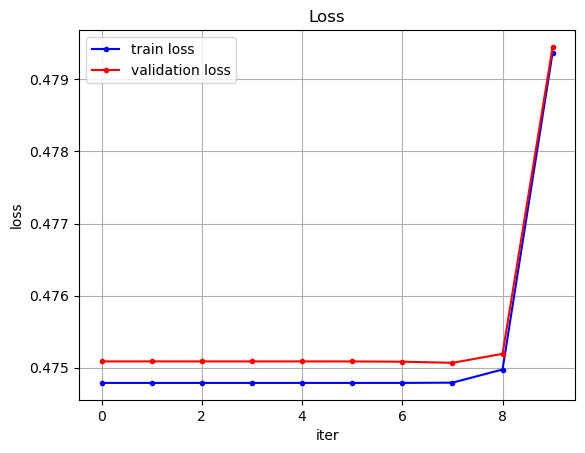

In [99]:
lambdas = np.logspace(-10,0,10)
cross_validation_ridge_regression(y,x_std,4,lambdas)

In [129]:
w, loss = least_squares(y,x_std)
loss, w

(0.4748256675765875,
 array([ 5.78254255e-02,  9.12359138e-03, -4.00143632e-03,  3.14487978e-03,
         6.71206905e-03, -4.61440430e-03, -5.12074238e-03, -3.49256202e-02,
         1.27868655e-02,  4.76480691e-02, -6.87390623e-02,  3.66727589e-04,
        -1.08027550e-02, -8.59358493e-04, -4.68678602e-02, -5.62926439e-03,
        -2.12903279e-03, -3.27349282e-02, -3.53085489e-02,  1.66647549e-03,
        -5.85589291e-02,  3.38028305e-02,  3.10558409e-03,  3.35799615e-03,
        -4.27732023e-03, -6.79591233e-03, -4.92873690e-03, -5.70277081e-03,
        -1.65651137e-02, -5.66118616e-04, -1.93778439e-02,  1.57922275e-03,
        -2.37486889e-03, -1.36870944e-03, -6.85950882e-03, -2.60891179e-03,
        -6.30706354e-03,  1.45174583e-03,  4.13462405e-03, -4.77555018e-03,
        -2.15650720e-03, -1.12749051e-03,  2.14379137e-04,  5.04443190e-03,
         1.54825478e-03,  1.89813799e-03,  8.57020018e-04, -7.50063407e-04,
         4.92830160e-03,  3.60180140e-04,  4.14649301e-03, -3.84291

In [125]:
# Logistic Regression
max_iter = 1000
gamma = 0.005
# lambdas = np.logspace(-10,0,10)
lambda_ = 0.006
w_, loss_  = reg_logistic_regression(y,x_std,lambda_,w,max_iter,gamma)

In [126]:
loss_, w_

(0.692952257746532,
 array([ 1.95554909e-01,  6.91538056e-02, -1.04413776e-02,  3.86630427e-02,
         1.42573209e-02, -1.13588991e-02, -2.17640581e-02, -1.32236079e-01,
         2.37362427e-03,  1.57780359e-01, -2.85298552e-01, -1.54780701e-02,
        -5.53403159e-02, -2.60001866e-02, -1.84925147e-01, -4.58288708e-02,
        -4.40245437e-03, -1.46934812e-01, -1.51145014e-01,  1.59196077e-02,
        -1.69441189e-01,  1.41076230e-01,  2.12463537e-02, -1.85216380e-02,
        -3.38431828e-02, -3.81785892e-02, -5.84765011e-03, -4.97775872e-02,
        -9.51757457e-02, -1.63598169e-02, -9.24932596e-02, -2.52924419e-02,
        -3.46241670e-02,  3.60246279e-02,  3.64430647e-03, -1.04977708e-02,
        -3.69083423e-02, -1.71327524e-03,  2.88029530e-02, -8.66359988e-03,
        -1.55324073e-02, -8.66832901e-04, -7.35767875e-03,  2.01935860e-02,
        -7.84926673e-03,  6.56473478e-03, -9.47812924e-03, -2.93422818e-03,
         6.56758583e-03,  4.99368605e-03,  1.01914740e-02, -3.975087

In [115]:
from util.evaluation import *

In [157]:
y_pred = sigmoid(x_std @ w_) > 0.5

In [158]:
y_pred = np.where(y_pred, 1, -1)

In [159]:
y_pred

array([-1,  1, -1, ...,  1, -1, -1])

In [160]:
precision(y, y_pred)

0.19206771937501416

In [161]:
accuracy(y, y_pred)

0.6629253203711887

In [162]:
f1_score(y, y_pred)

0.31522640878641917

In [148]:
def precision(true_labels: np.ndarray,
              predicted_labels: np.ndarray) -> float:
    """
    Calculate the precision of a classifier.
    :param true_labels (numpy.ndarray): True class labels.
    :param predicted_labels (numpy.ndarray): Predicted class labels.
    :return float: precision of the classifier.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_positives = np.sum((true_labels == -1) & (predicted_labels == 1))

    return true_positives / (true_positives + false_positives)


def recall(true_labels: np.ndarray,
           predicted_labels: np.ndarray) -> float:
    """
    Calculate the recall of a classifier.
    :param true_labels (numpy.ndarray): True class labels.
    :param predicted_labels (numpy.ndarray): Predicted class labels.
    :return float: recall of the classifier.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == -1))

    return true_positives / (true_positives + false_negatives)

def f1_score(true_labels: np.ndarray,
             predicted_labels: np.ndarray) -> float:
    """
    Calculate the F1 score of a classifier.
    :param true_labels (numpy.ndarray): True class labels.
    :param predicted_labels (numpy.ndarray): Predicted class labels.
    :return float: F1 score of the classifier.
    """
    if true_labels.shape != predicted_labels.shape:
        raise ValueError("Input arrays must have the same shape.")
    
    precision_s = precision(true_labels, predicted_labels)
    recall_s = recall(true_labels, predicted_labels)
    
    return 2 * (precision_s * recall_s) / (precision_s + recall_s)
    
